In [1]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(r"C:\Users\Mohan\Downloads\glass.csv")

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
X = data.iloc[:,0:9]
Y = data.iloc[:,9]

In [5]:
kfold = KFold(n_splits=10)

In [6]:
model = KNeighborsClassifier(n_neighbors=10)
results = cross_val_score(model, X, Y, cv=kfold)

In [7]:
print(results.mean())

0.42012987012987013


In [8]:
# for best fold and splits using gridsearch

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
n_neighbors = np.array(range(1,50))
param_grid = dict(n_neighbors=n_neighbors)

In [11]:
model1 = KNeighborsClassifier()
grid = GridSearchCV(estimator=model1, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [12]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


In [13]:
import matplotlib.pyplot as plt 

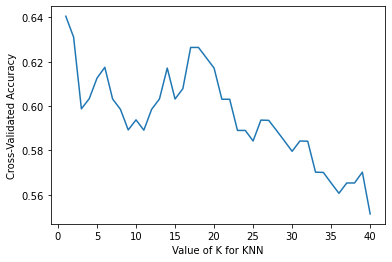

In [14]:
k_range = range(1, 41)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

<AxesSubplot:>

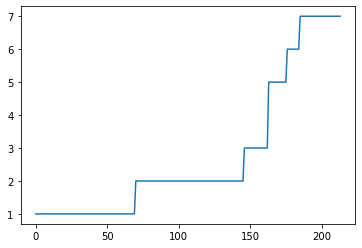

In [15]:
Y.plot()

<AxesSubplot:xlabel='RI', ylabel='Type'>

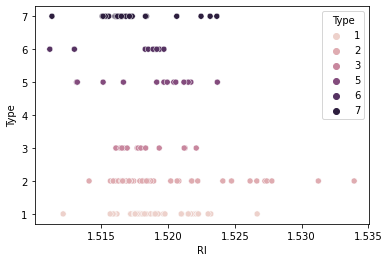

In [16]:
#Ri content
import seaborn as sns
sns.scatterplot(data=data,x='RI',y='Type',hue='Type')